**<font color="red">TO-READ:</font>** 
**Please note that this project involves work of others, and that not everything may be 100% reliable. However, majority of the algorithms correctness have been tested**

**<font color="lightgreen">Chat-GPT:</font>**
**some Chat-GPT solutions have been provided for demonstration purposses, by no means blind-foldedly trust these algorithms generated by AI, however the correctness of these algorithms have been verified** 

In [178]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
from sympy.plotting import plot3d
import matplotlib.pyplot as plt

<font size="100"> **_Coordinate Descent_**</font> 

In [179]:
x0 = 1
y0 = 3
# define the dimensions
x, y = sp.symbols('x y')
# define the function
f = 1/2*(20-x*y)**2+(x-y)**2
# functionalize the function
f_func = lambdify((x, y),f, modules=['numpy'])

# define the derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
# functionalize the partial derivatives
df_dx_func = lambdify((x, y),df_dx, modules=['numpy'])
df_dy_func = lambdify((x, y),df_dy, modules=['numpy'])
# define the starting point
x0, y0 = 1, 3

In [180]:
f_func(x0, y0), df_dx_func(x0, y0), df_dy_func(x0, y0)

(148.5, -55.0, -13.0)

In [181]:
# functionalize partial derivatives with respect to a dimension while
# another dimension is fixed

# partial derivative of f with respect to x when y is fixed
df_dx_y_func = lambdify(y,df_dx)
# partial derivative of f with respect to y when x is fixed
df_dy_x_func = lambdify(x,df_dy)

In [182]:
# perform 1st coordinate descent step
x1 = sp.solve(df_dx_y_func(y0), x)[0]
y1 = sp.solve(df_dy_x_func(x1), y)[0]
x1, y1, f_func(x1, y1)

(6.00000000000000, 3.47368421052632, 6.73684210526316)

In [183]:
# perform 2nd coordinate descent step
x2 = sp.solve(df_dx_y_func(y1), x)[0]
y2 = sp.solve(df_dy_x_func(x2), y)[0]
x2, y2, f_func(x2, y2)

(5.43284757778654, 3.79246353592084, 2.87319311877684)

<font color="red">WARNING:</font>  python version **3.10.8** is needed for the plot down below

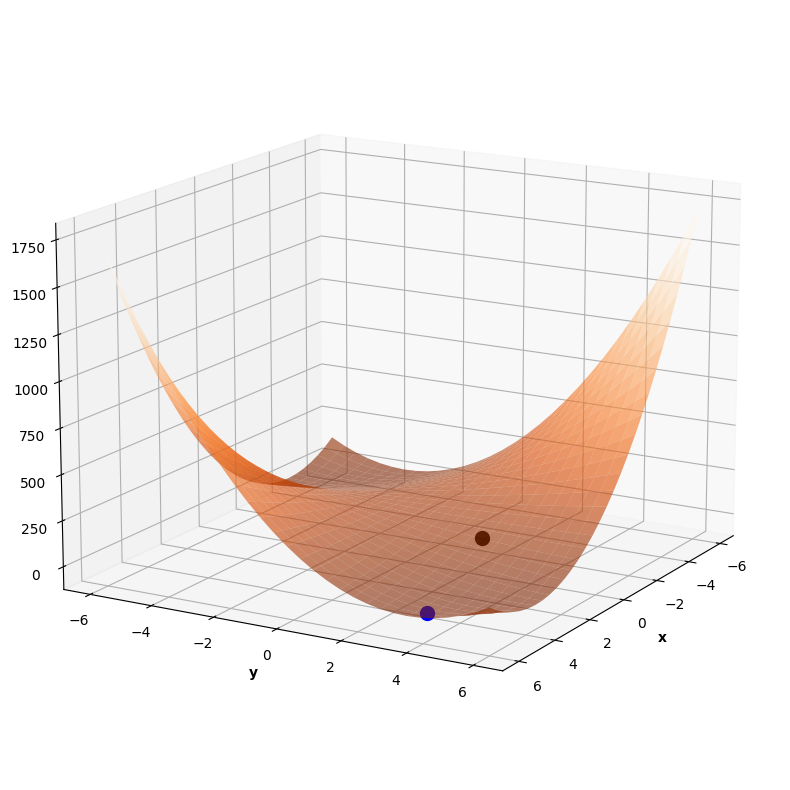

In [184]:
# NOTE: visuaize the plot
x_points = np.linspace(-6, 6, 30)
y_points = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x_points, y_points)
Z = f_func(X, Y)

# set the figure size
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
# plot the surface of the function
# set cmap to define plot color
# set alpha to define opaquenesss
ax.plot_surface(X, Y, Z, cmap='Oranges_r', alpha=0.6)
# set labels
ax.set_xlabel('x', weight='bold')
ax.set_ylabel('y', weight='bold')
# set angles
elev=15         # set the vertical angle
azim=30         # set the horizontal angle
ax.view_init(elev, azim)    # define view
ax.view_init(elev, azim)
ax.scatter(*[x0, y0], f_func(x0, y0), color='black', s=100, alpha=1)    # starting position
ax.scatter(*[x2, y2], f_func(x2, y2), color='b', s=100, alpha=1)        # converged position

<font size="100"> **_Gradient Descend_**</font> 

In [185]:
# define the dimensions
x, y = sp.symbols('x y')

# define the function
f = x**4 + 4*x*y + 2*y  + (1/2)*y**2
# functionalize the function
f_func = lambdify((x, y), f)

# define the derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# functionalize the partial derivatives
df_dx_func = lambdify((x, y), df_dx)
df_dy_func = lambdify((x, y), df_dy)


In [186]:
# define gradient 
def gradient(pos):
    gradient = np.array([0 for _ in pos])
    gradient[0] = df_dx_func(pos[0], pos[1])
    gradient[1] = df_dy_func(pos[0], pos[1])
    return gradient

# define gradient descend
def gradient_descent(cur_pos, eta=0.05, max_iter=5):
    for _ in range(max_iter):
        cur_pos = cur_pos - eta*gradient(cur_pos)
    return cur_pos, f_func(cur_pos[0], cur_pos[1])

In [187]:
# perform gradient descend
record = gradient_descent([1, 1], eta=0.01, max_iter=100)
# get new position
pos = record[0]
record, gradient(pos)

((array([ 1.34, -2.75]), -13.234570640000012), array([-1,  4]))

**_<font color='lightgreen'>CHAT-GPT Genereated Gradient Descend [η = 0.2, iter=30] </font>_** 

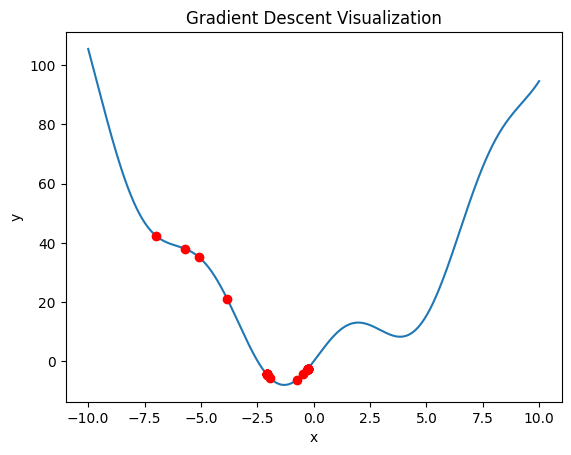

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# define the function to minimize
def f(x):
    return x**2 + 10*np.sin(x)

# define the derivative of the function
def df(x):
    return 2*x + 10*np.cos(x)

# define the gradient descent algorithm
def gradient_descent(f, df, x_init, alpha, num_iterations):
    # initialize the x and iteration arrays
    x = np.zeros((num_iterations,))
    # git author note: set the starting position
    x[0] = x_init
    iterations = np.arange(num_iterations) + 1
    # perform gradient descent
    for i in range(1, num_iterations):
        x[i] = x[i-1] - alpha*df(x[i-1])
    # return the final x value and the array of intermediate values
    return x[-1], x, iterations

# set the initial x value and learning rate
x_init = -7
# git author note: equivalent to parameter eta
alpha = 0.2
# git author note: number of gradient descent steps
num_iterations = 30

# run the gradient descent algorithm
x_min, x_values, iterations = gradient_descent(f, df, x_init, alpha, num_iterations)

# plot the function and the descent
x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y)
plt.plot(x_values, f(x_values), 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Visualization')
plt.show()


**_<font color='lightgreen'>CHAT-GPT Genereated Gradient Descend [η = 0.8, iter=30] </font>_**

<font color='red'>WARNING:</font> _since the η parameter is very high here, the algorithm overshoots and jumps around the local minima. Notice how it also fails to converge to a local minima_ 

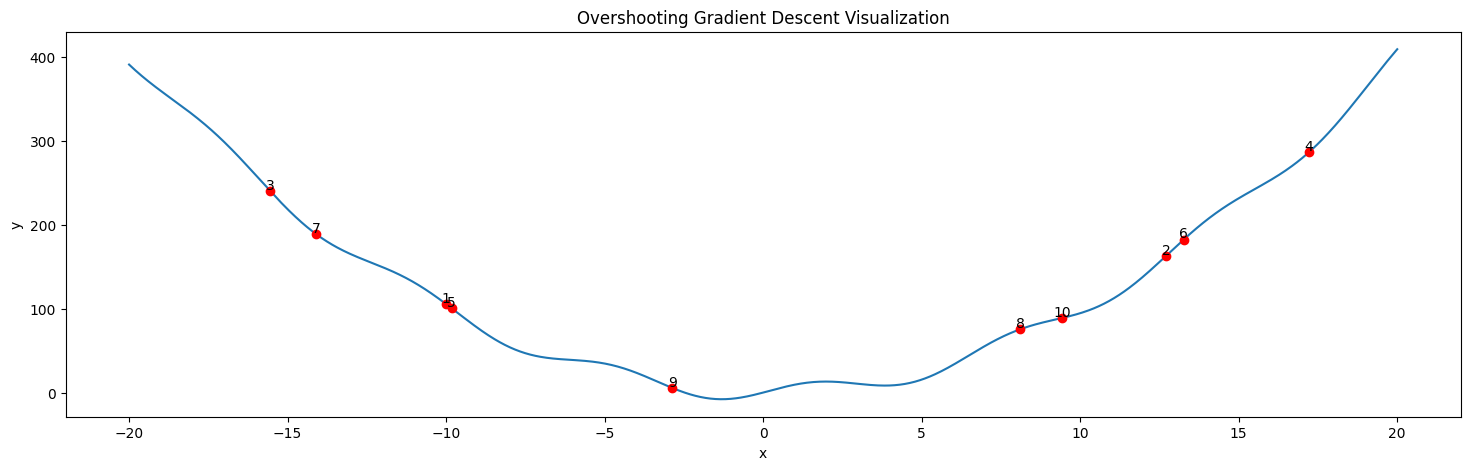

In [189]:
import numpy as np
import matplotlib.pyplot as plt

# set the initial x value and learning rate
x_init = -10
alpha = 0.8
num_iterations = 10

# run the gradient descent algorithm
x_min, x_values, iterations = gradient_descent(f, df, x_init, alpha, num_iterations)

# plot the function and the descent
fig = plt.figure(figsize=(18, 5)) 
x = np.linspace(-20, 20, 1000)
y = f(x)
plt.plot(x, y) 
plt.plot(x_values, f(x_values), 'ro')
for i in range(len(iterations)):
    plt.annotate(iterations[i], xy=(x_values[i], f(x_values[i])), xytext=(x_values[i], f(x_values[i])+2), ha='center')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overshooting Gradient Descent Visualization')
plt.show()


<font color="red">WARNING:</font>  python version **3.10.8** is needed for the plot down below

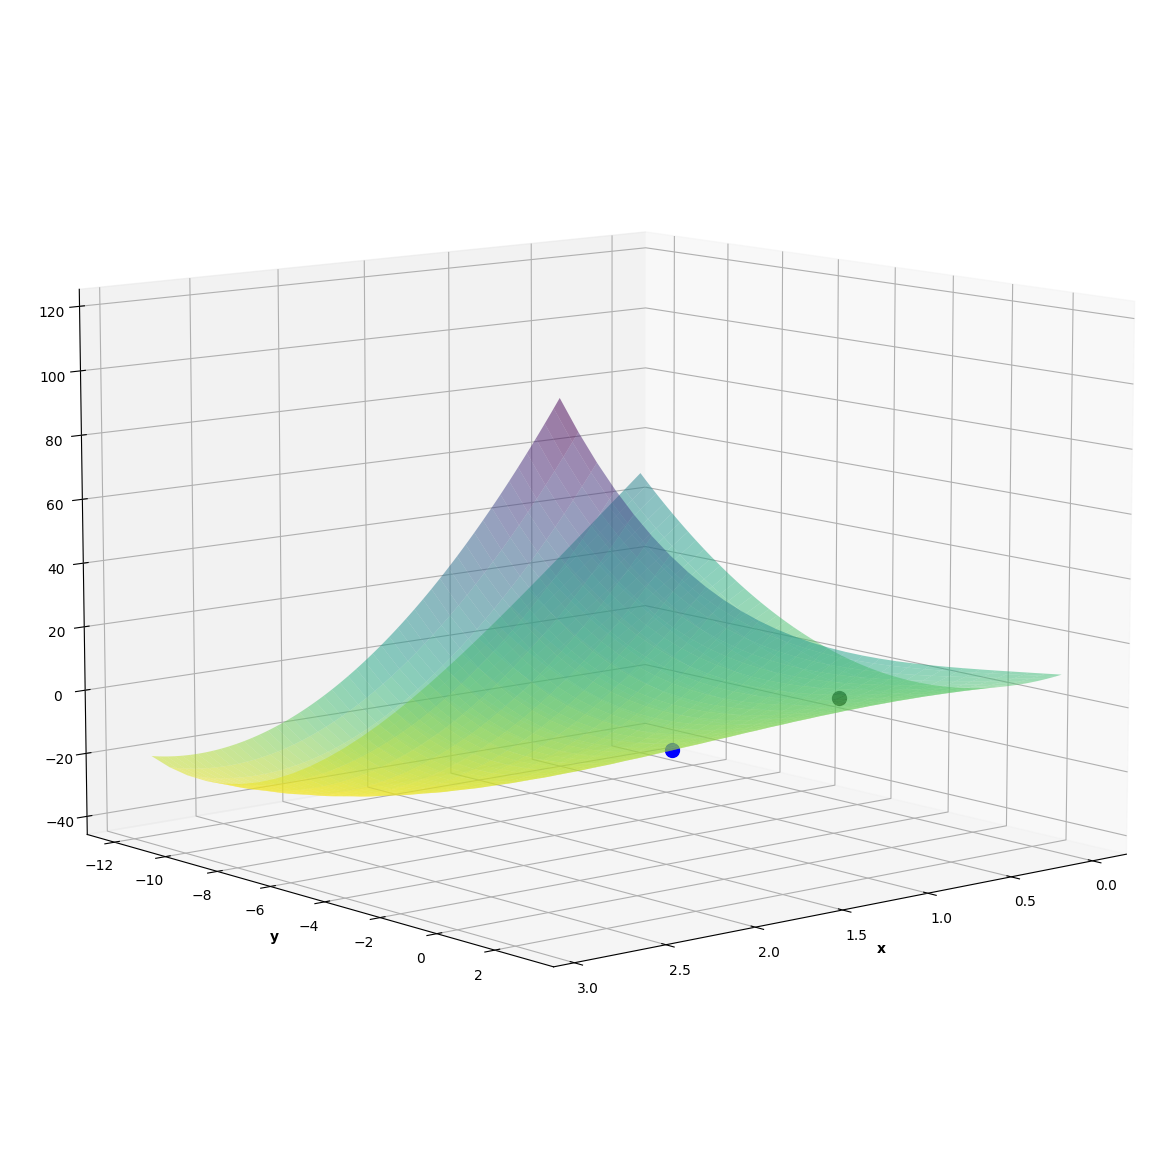

In [190]:
# viualize the plot
x = np.arange(0, 3, 0.1)
y = np.arange(-12, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = f_func(X, Y)

# set the figure size
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
# plot the surface of the function
# set cmap to define plot color
# set alpha to define opaquenesss
ax.plot_surface(X, Y, Z,  cmap='viridis_r', alpha=0.5)
# set labels
ax.set_xlabel('x', weight='bold')
ax.set_ylabel('y', weight='bold')


elev=10         # set the vertical angle
azim=50         # set the horizontal angle
ax.view_init(elev, azim)    # define view

ax.scatter(*[1,1], f_func(1, 1), color='black', s=100, alpha=1)         # starting position
ax.scatter(*pos, f_func(pos[0], pos[1]), color='b', s=100, alpha=1)     # converged position

<font size="100"> **_Regression_**</font> 

In [191]:
# set the data matrix and ground-truths
D=np.array([[1.5,2],[-1,1],[0.5,0.5],[-0.5,-1],[4,2]])      
y=np.array([1,0,2,0.5,3])

In [192]:
# set the basis function
def phi(d):
    return np.array([1, d[0], d[1]])

In [193]:
# set the design matrix
X = [phi(np.array(d).T).T for d in D]
X = np.array(X)
X, X.shape

(array([[ 1. ,  1.5,  2. ],
        [ 1. , -1. ,  1. ],
        [ 1. ,  0.5,  0.5],
        [ 1. , -0.5, -1. ],
        [ 1. ,  4. ,  2. ]]),
 (5, 3))

In [194]:
# compute the beta vector for standard regression
beta = np.linalg.inv((X.T@X))@X.T@y
beta

array([ 0.96282173,  0.65443279, -0.27979028])

In [195]:
# compute the beta vector for ridge regression
beta = np.linalg.inv(X.T@X + 2*np.identity(3))@(X.T@y)
beta
# regression ends here

array([0.57752179, 0.52552927, 0.02054795])

In [196]:
#y[0] denotes prediction
#y[1] denotes ground-truth

# partial derivative of the loss w.r.t yHat
def yHatLoss(yHat, yTrue):
    return 2*(yHat - yTrue)

In [197]:
# set ground-truth provided in the exercise
yTrue = 2
# compute the prediction
yHat = max(0, 3)*0.5 + max(0, -3)*2 
# compute the derivative of th loss
dyHatL = yHatLoss(yHat, yTrue)
dyHatL

-1.0

In [198]:
# define the partial derivative of the activation function w.r.t. the activation
def daReLu(a):
    return 1 if a > 0 else 0

In [199]:
# derivative of Loss w.r.t the first activation
da1L = dyHatL*0.5*daReLu(3)
da1L

-0.5

In [200]:
# derivative of Loss w.r.t the second activation
da2L = dyHatL*2*daReLu(0)
da2L

-0.0

<font size="100"> **_Convolution_**</font> 

In [201]:
# set the feature maps
h1 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0]
]
)
h2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0]
]
)
h3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
]
)
# set the kernels
k1 = np.array([
    [0, 0.5, 1],
    [-0.5, 0, 0.5],
    [-1, -0.5, 0]
]
) 
k2 = np.array([
    [0, -0.5, 0],
    [-0.5, 2, -0.5],
    [0, -0.5, 0]
]
)
k3 = np.array([
    [0, 0, 0],
    [0, -1, 0],
    [0, 0, 0]
]
)

In [202]:
# define the convolution operation
def convolution(h, k):
    map = [ [np.sum(h[i:i+3, j:j+3]*k) for j in range(4)]  for i in range(4)]
    map = np.array(map)
    # return the newly computed feature map
    return map

In [203]:
# compute feature maps after the convolutional layer
map1, map2, map3 = convolution(h1, k1), convolution(h2, k2), convolution(h3, k3)

In [204]:
# see the 1st feature map yielded by the 1st kernel
map1

array([[ 0., -1., -1., -1.],
       [ 1.,  0., -1., -1.],
       [ 1.,  1.,  0., -1.],
       [ 1.,  1.,  1.,  0.]])

In [205]:
# see the 2nd feature map yielded by the 2nd kernel
map2

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [206]:
# see the 3rd feature map yielded by the 3rd kernel
map3

array([[ 0,  0, -1, -1],
       [ 0,  0,  0, -1],
       [-1,  0,  0,  0],
       [-1, -1,  0,  0]])

In [207]:
# set the bias matrix
# per neuron one bias
b = np.full((4, 4), -2)
# compute the new RGB feature map (containing the biases as well)
a = map1 + map2 + map3 + b
a

array([[ 0., -4., -4., -4.],
       [-2.,  0., -4., -4.],
       [-2., -2.,  0., -4.],
       [-2., -2., -2.,  0.]])

In [208]:
# compute the trace of the matrix
np.trace(a)

0.0

<font size="100"> **_PCA_**</font> 

In [209]:
# set the data matrix
D = np.array([[1, 2, 0],[0, 2, 1],[8,2,2]])
# set the rank of the matrix factorization
rank = 2
# compute the mean per feature
muF = D.mean(axis=0)
# per feature sample, subtract the mean so that data distribution is
# centralized
C = D - np.outer(np.ones(3), muF)
# observe the new feature means
C.mean(axis=0)

array([0., 0., 0.])

In [210]:
# perform SVD
# WARNING: np.linalg.svd returns V.T, not V
U, S, Vt = np.linalg.svd(C)
Vt

array([[ 9.82854178e-01,  0.00000000e+00,  1.84384555e-01],
       [ 1.84384555e-01,  0.00000000e+00, -9.82854178e-01],
       [-0.00000000e+00,  1.00000000e+00, -2.22044605e-16]])

In [211]:
# transpose Vt to get PCs as column vectors
# get the 1st PC
pc1 = Vt.T[:,0]
# get the 2nd PC
pc2 = Vt.T[:,1]
pc1, pc2

(array([0.98285418, 0.        , 0.18438456]),
 array([ 0.18438456,  0.        , -0.98285418]))

In [212]:
# get the 1st observation
D1 = D[0]
D1

array([1, 2, 0])

In [213]:
# project the 1st observation onto PC1
D1@pc1

0.9828541782841685

In [214]:
# project the 1st observation onto PC2
D1@pc2

0.18438455528962291

In [215]:
# compute the Λ matrix
# NOTE: covariance matrix is:  R = C@C.T, 
# R = (USV.T)@(USV.T).T = U@S@V.T@V@S@U.T = U@S@S.T@U.T, NOTE: V.T@V = I
# Λ = S@S.T
Λ = np.diag(S) @ np.diag(S).T
# diagnonals of Λ have the variances pecentually
Λ

array([[3.93132079e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.86792084e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.95604012e-34]])

In [216]:
# compute the variance convered by PC1, PC2
((Λ[0][0] + Λ[1][1]) / (Λ[0][0] + Λ[1][1] + Λ[2][2]))*100

100.0

In [217]:
# set the data matrix
D = np.array([[1, 3, 1],[1, 2, 2],[-1, 3, 1],[5, 2, 3],[3, 2, 4]])
D

array([[ 1,  3,  1],
       [ 1,  2,  2],
       [-1,  3,  1],
       [ 5,  2,  3],
       [ 3,  2,  4]])

**_<font color='lightgreen'>CHAT-GPT Genereated PCA [rank = 3] </font>_** 

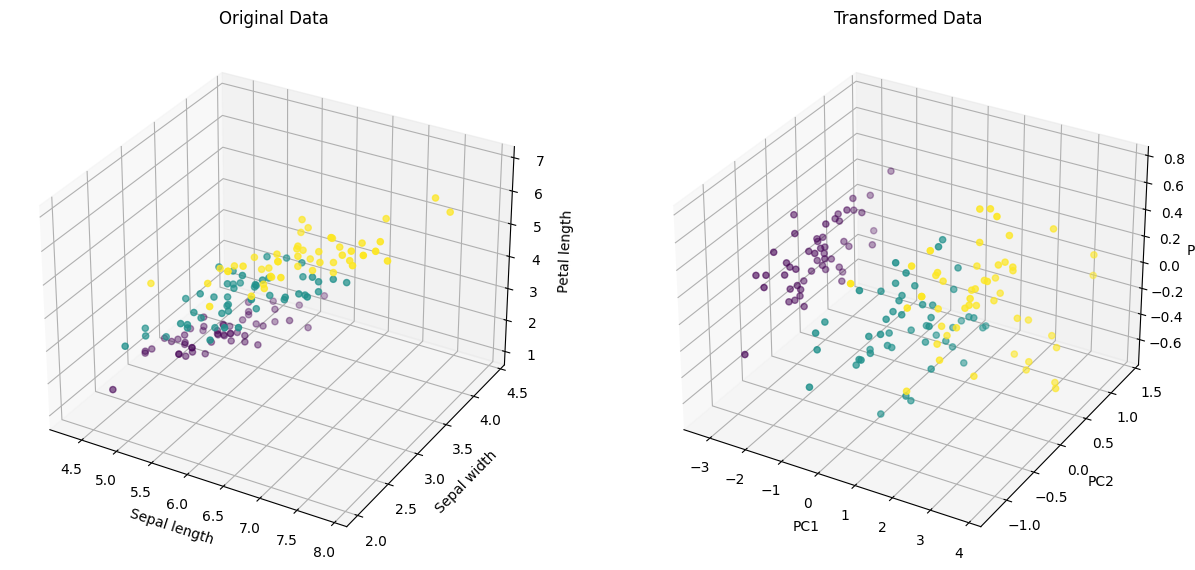

In [218]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load iris dataset
iris = load_iris()

# plot the original iris data in a 3D scatter plot
fig = plt.figure(figsize=(15, 7))
# git author note: create a figure table of 1 row and 2 columns
ax = fig.add_subplot(121, projection='3d')
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=iris.target)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
ax.set_title('Original Data')

# fit PCA model to iris dataset
# git author note: do rank = 3 PCA
pca = PCA(n_components=3)
pca.fit(iris.data)

# transform iris dataset into principal component space
iris_pca = pca.transform(iris.data)

# plot the transformed iris data in a 3D scatter plot
ax = fig.add_subplot(122, projection='3d')
# c denotes the labels of the observations
ax.scatter(iris_pca[:, 0], iris_pca[:, 1], iris_pca[:, 2], c=iris.target)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Transformed Data')
plt.show()


_Notice how the dataset observations are much more identifiable after PCA hass beedn applied (Transformed data). Also notice how the dataset is centered to the origin of the space on the latter picture. This is because PCA was applied on the **centered** data_

<font size="100"> **_k-means_**</font> 

In [219]:
from sklearn.cluster import KMeans
import numpy as np

In [220]:
# loss / objective function of k-means
def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)
# get cluster-indicator matrix
def getY(labels):
    Y = np.zeros((len(labels), max(labels)+1))
    for i in range(0, len(labels)):
        Y[i, labels[i]] = 1
    return Y

In [221]:
M = np.array([[1, 3, 1],[1, 2, 2],[-1, 3, 1],[5, 2, 3],[3, 2, 4]])

In [222]:
r=2
kmeans = KMeans(n_clusters=r)
kmeans.fit(M)

c:\Users\20200710\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\20200710\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

The cluster indicator matrix has exactly one one in every row. Every column represents one cluster.

In [223]:
Y = getY(kmeans.labels_)
X = kmeans.cluster_centers_.T
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

The matrix $Y^\top Y$ is a diagonal matrix, having the number of points which are assigned to each cluster on the diagonal.

In [224]:
Y.T@Y

array([[3., 0.],
       [0., 2.]])

In [225]:
X

array([[0.33333333, 4.        ],
       [2.66666667, 2.        ],
       [1.33333333, 3.5       ]])

In [226]:
RSS(M, X, Y)

6.5

**_<h1><font color='lightblue'>Data-Pre-Prep</font></h1>_**

In [227]:
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target variable
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

#combining weather and temp into single list of tuples
features=list(zip(weather_encoded,temp_encoded))

<font size="100"> **_Confusion Matrices_**</font> 

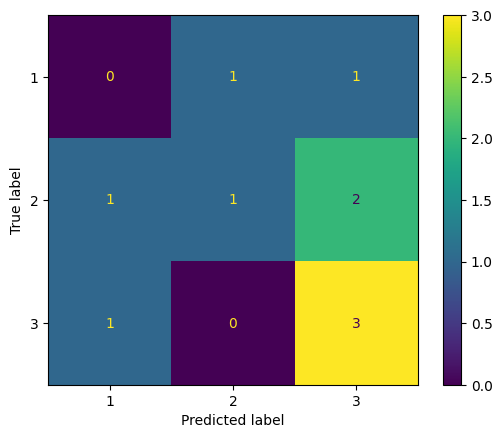

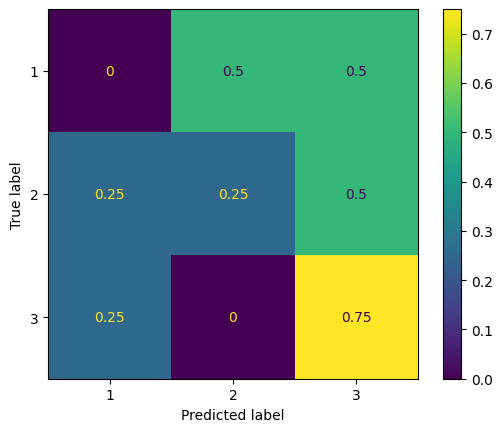

In [228]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

actual = [3, 3, 2, 2, 1, 1, 2, 3, 2, 3]
predicted = [3, 1, 1, 3, 3, 2, 3, 3, 2, 3]

#Unnormalized CM

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])
cm_display.plot()
plt.show() 

#Normalized CM

confusion_matrix2 = metrics.confusion_matrix(actual, predicted, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [1, 2, 3])
cm_display.plot()
plt.show() 

<font size="100"> **_Random Forests_**</font> 

In [229]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2, random_state=0)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)

[1]


<font size="100"> **_SVM (Hard-Margin)_**</font> 

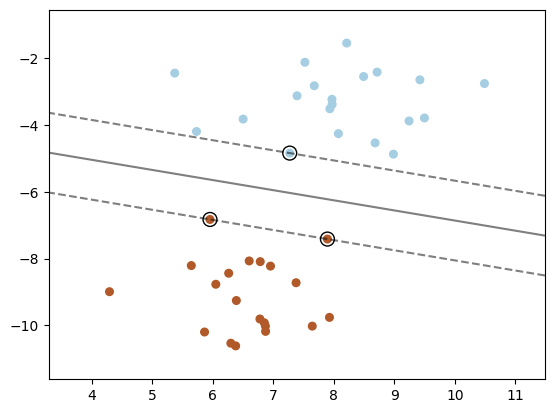

In [230]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000) #try kernel ='poly', and kernel='rbf'!
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

_The dashed lines denote the support vectors_

<font size="100"> **_CART_**</font> 

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [232]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8947368421052632


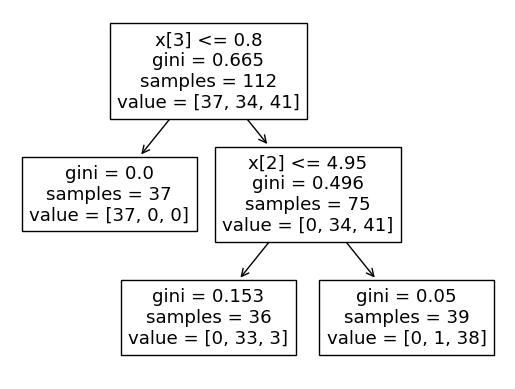

In [233]:
tree.plot_tree(clf)
plt.show()

_Decision thresholds determined, measure of entropy per node is also provided (gini as the metric)._

<font size="100"> **_K-nearest-neigbours_**</font> 

In [234]:
from sklearn.neighbors import KNeighborsClassifier

# compute 3-nearest-neighbours
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets (defined in data-pre-prep section)
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)

[1]


_According to K-nearest neighbour, where K = 3, an observation with features 'overcast' and 'mild' is provided, it is classified as label 1_

**_<font color='lightgreen'>CHAT-GPT Genereated K-Nearest-Neighbours [K = 5] </font>_** 

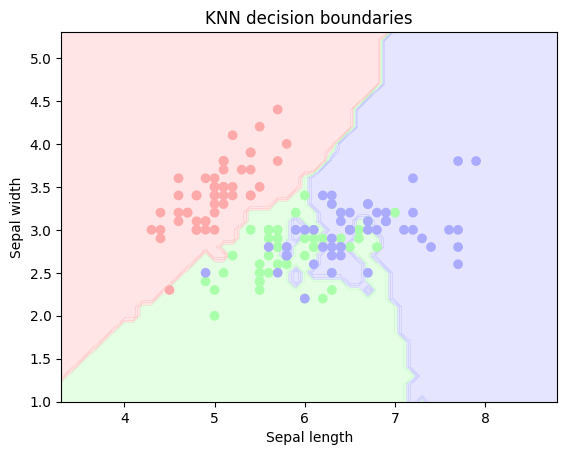

In [235]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Load iris dataset
iris = load_iris()

# Set X and y values
X = iris.data[:, :2] # only use the first two features
y = iris.target

# Create KNN classifier object
k = 5
clf = KNeighborsClassifier(k)

# Fit the classifier with the training data
clf.fit(X, y)

# Define the range of values for the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of values
# git author note: this will be our testing data!
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class labels for all points in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define the colormap for the plot
# git author note: this will be used for identifying different class regions
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot the decision boundaries
# git author note: this will be used for drawing the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('KNN decision boundaries')
plt.show()


<font size="100"> **_Naive-Bayes_**</font> 

In [236]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)

[1]
